# Genggam Makna Model Development

In [6]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
   

In [1]:
# importing dependencies and stuff
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from keras import regularizers
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

## Data Processing

In [2]:
# Dataset from Kaggle (https://www.kaggle.com/datasets/alvinbintang/sibi-dataset/data)

import kagglehub

# Download latest version
path = kagglehub.dataset_download("alvinbintang/sibi-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1


In [3]:
from os import listdir
print(listdir(path+"/SIBI"))

['A', 'P', 'M', 'I', 'X', 'C', 'K', 'S', 'Q', 'T', 'O', 'F', 'L', 'U', 'V', 'B', 'G', 'W', 'E', 'D', 'N', 'Y', 'H', 'R']


In [4]:
train_dir = os.path.join(path, "SIBI")
eval_dir = os.path.join(path, "SIBI")

In [ ]:
for root, dirs, files in os.walk(train_dir):
    print(f"Directory: {root}, Number of images: {len(files)}")

Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI, Number of images: 0
Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI/O, Number of images: 220
Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI/F, Number of images: 220
Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI/P, Number of images: 220
Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI/Q, Number of images: 220
Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI/T, Number of images: 220
Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI/K, Number of images: 220
Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI/S, Number of images: 220
Directory: /root/.cache/kagglehub/datasets/alvinbintang/sibi-dataset/versions/1/SIBI/C, Number of images: 220
Directory: /ro

In [ ]:
valid_extensions = {".jpg", ".jpeg", ".png"}
total_images = 0

for root, _, files in os.walk(train_dir):
    for file in files:
        if os.path.splitext(file)[1].lower() in valid_extensions:
            total_images += 1

print("Total valid images:", total_images)

Total valid images: 5280


In [ ]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(class_label):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (224, 224))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
class_label = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if class_label == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, stratify = labels)

n = len(class_label)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of class: ", n)
print("Total number of training images: " , train_n)
print("Total number of testing images: ", test_n)

Total number of class:  24
Total number of training images:  4752
Total number of testing images:  528


In [ ]:
class_label

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [ ]:
# one-hot encode categorical labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [ ]:
# convert datatype and normalization
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

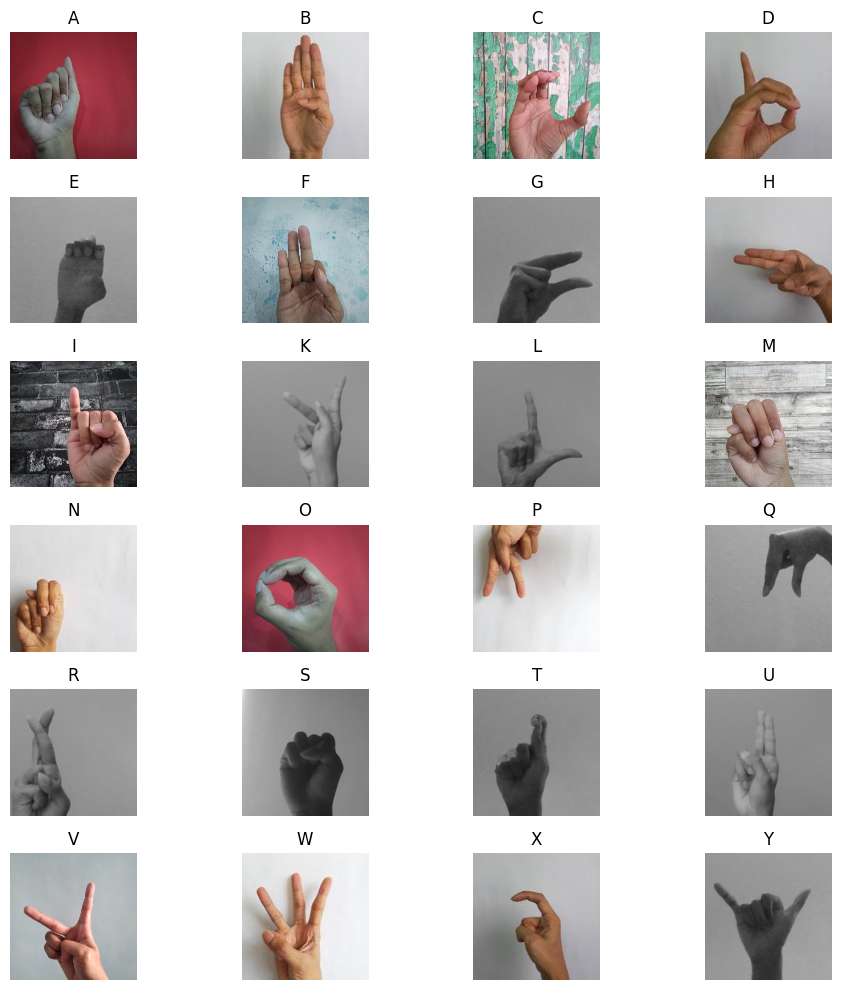

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2

# function to visualize random images from each label
def visualize_random_images(directory, labels):
    plt.figure(figsize=(10, 10))
    # loop through each label and display a random image
    for idx, label in enumerate(labels):
        label_dir = os.path.join(directory, label)
        # get all files in the label's directory
        files = [f for f in os.listdir(label_dir) if os.path.splitext(f)[1].lower() in valid_extensions]

        # select a random image from the files
        random_image_file = random.choice(files)
        random_image_path = os.path.join(label_dir, random_image_file)

        # read the image using OpenCV
        img = cv2.imread(random_image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB for displaying in matplotlib

        # plot the image
        plt.subplot(6, 4, idx + 1)  # adjust the grid size (6x4) to match the number of labels
        plt.imshow(img)
        plt.title(label)  # show the label as title
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# visualize one random image from each label
visualize_random_images(train_dir, class_label)

## Model

In [ ]:
# transfer learning
input_layer = Input(shape=(224, 224, 3))
pt_model = VGG16(input_tensor=input_layer, include_top=False, weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# freeze all the layers of the pre-trained model
for layer in pt_model.layers:
    layer.trainable = False

In [ ]:
x = pt_model.output
x = Flatten()(x)
x = Dense(units=128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(units=64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(units=32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(units=32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(units=64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(units=128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(units=24, activation='softmax')(x)
model = Model(inputs = input_layer, outputs = x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,952,792 (68.48 MB)

 Trainable params: 3,237,208 (12.35 MB)

 Non-trainable params: 14,715,584 (56.14 MB)

In [ ]:
# compile the model
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
# augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,  # Random rotations between 0 and 30 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zooms
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest',  # Fill empty pixels after transformations
)

In [ ]:
# test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_aug = train_datagen.flow(X_train, y_train)
# validation_generator = test_datagen.flow(X_test, y_test, batch_size=64)

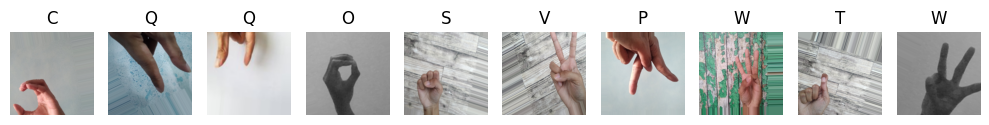

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def visualize_augmented_images(generator, num_images=10, class_labels=None):
    for batch, labels in generator:
        plt.figure(figsize=(10, 10))

        # loop through the first 'num_images' images in the batch
        for i in range(num_images):
            img = batch[i]
            label = labels[i]

            # normalize the image to [0, 255] before converting to uint8
            img = np.clip(img * 255, 0, 255).astype('uint8')

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            label_str = class_labels[np.argmax(label)]  # decode the one-hot label

            # plot the image
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img_rgb)
            plt.title(label_str)
            plt.axis('off')

        plt.tight_layout()
        plt.show()
        break

class_labels = sorted(os.listdir(train_dir))

visualize_augmented_images(train_data_aug, num_images=10, class_labels=class_labels)

In [ ]:
# callbacks
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.90:
          print("\nReached 90% accuracy, stopping training...")
          self.model.stop_training = True

In [ ]:
callback = CustomCallback()

In [ ]:
# fit (train)
history = model.fit(
    train_data_aug,
    epochs=200,
    validation_data=(X_test,y_test),
    callbacks=[callback], batch_size=64
)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 63s 350ms/step - accuracy: 0.0989 - loss: 3.2822 - val_accuracy: 0.1193 - val_loss: 2.8333
Epoch 2/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 46s 295ms/step - accuracy: 0.2410 - loss: 2.3560 - val_accuracy: 0.2330 - val_loss: 2.5638
Epoch 3/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 46s 294ms/step - accuracy: 0.3812 - loss: 1.8698 - val_accuracy: 0.4356 - val_loss: 1.5117
Epoch 4/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 46s 296ms/step - accuracy: 0.4207 - loss: 1.6688 - val_accuracy: 0.4318 - val_loss: 1.8055
Epoch 5/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 46s 294ms/step - accuracy: 0.4707 - loss: 1.5284 - val_accuracy: 0.5682 - val_loss: 1.1723
Epoch 6/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 46s 296ms/step - accuracy: 0.5236 - loss: 1.3723 - val_accuracy: 0.7538 - val_loss: 0.7567
Epoch 7/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 46s 296ms/step - accuracy: 0.5696 - loss: 1.2959 - val_accuracy: 0.7765 - val_loss: 0.6532
Epoch 8/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 46s 296ms/step - accuracy: 0.6005 - loss: 1.222

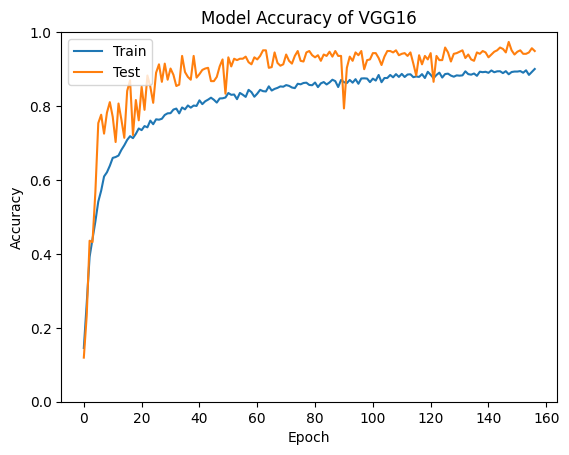

In [ ]:
import matplotlib.pyplot as plt

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy of VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0, 1)
plt.show()

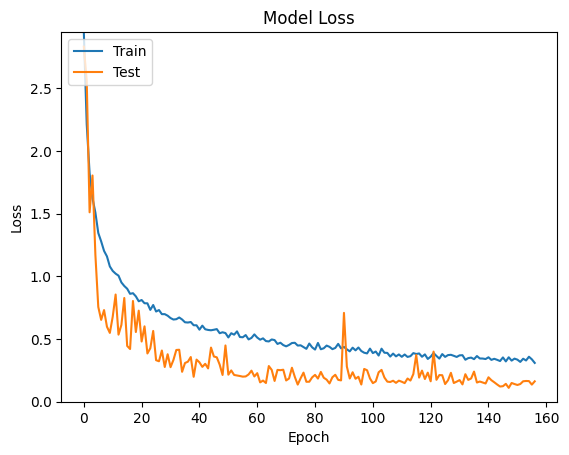

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])))
plt.show()

In [ ]:
model.save('modelslfinal.h5')

## Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step
Top predictions:
S: 94.43%
M: 2.70%
A: 0.90%
I: 0.63%
N: 0.62%


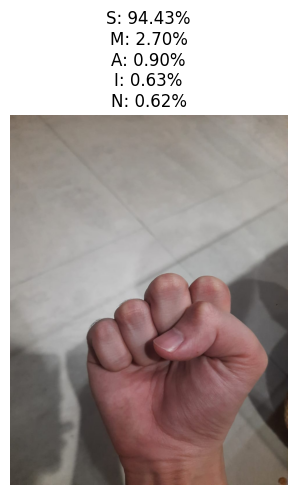

In [45]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('modelslfinal.h5')

# Function to preprocess image and predict classes with top N probabilities
def classify_image(img_path, top_n=3):
    img = image.load_img(img_path, target_size=(224, 224))

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0

    # Predict the classes
    prediction = model.predict(img_array)

    # Get the class labels (make sure 'train_dir' is defined and points to your training directory)
    class_labels = sorted(os.listdir(train_dir))  # Update 'train_dir' as needed

    # Get the indices of the top N predictions
    top_indices = np.argsort(prediction[0])[::-1][:top_n]

    # Prepare the results: class labels and their corresponding probabilities
    top_classes = [(class_labels[idx], prediction[0][idx]) for idx in top_indices]

    # Print the top N predictions and their probabilities
    print("Top predictions:")
    for label, prob in top_classes:
        print(f"{label}: {prob * 100:.2f}%")

    # Show the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot image with top N predictions as title
    plt.imshow(img)
    plt.title("\n".join([f"{label}: {prob * 100:.2f}%" for label, prob in top_classes]))
    plt.axis('off')
    plt.show()

# Image path for testing
img_path = '/content/S.jpeg'
classify_image(img_path, top_n=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


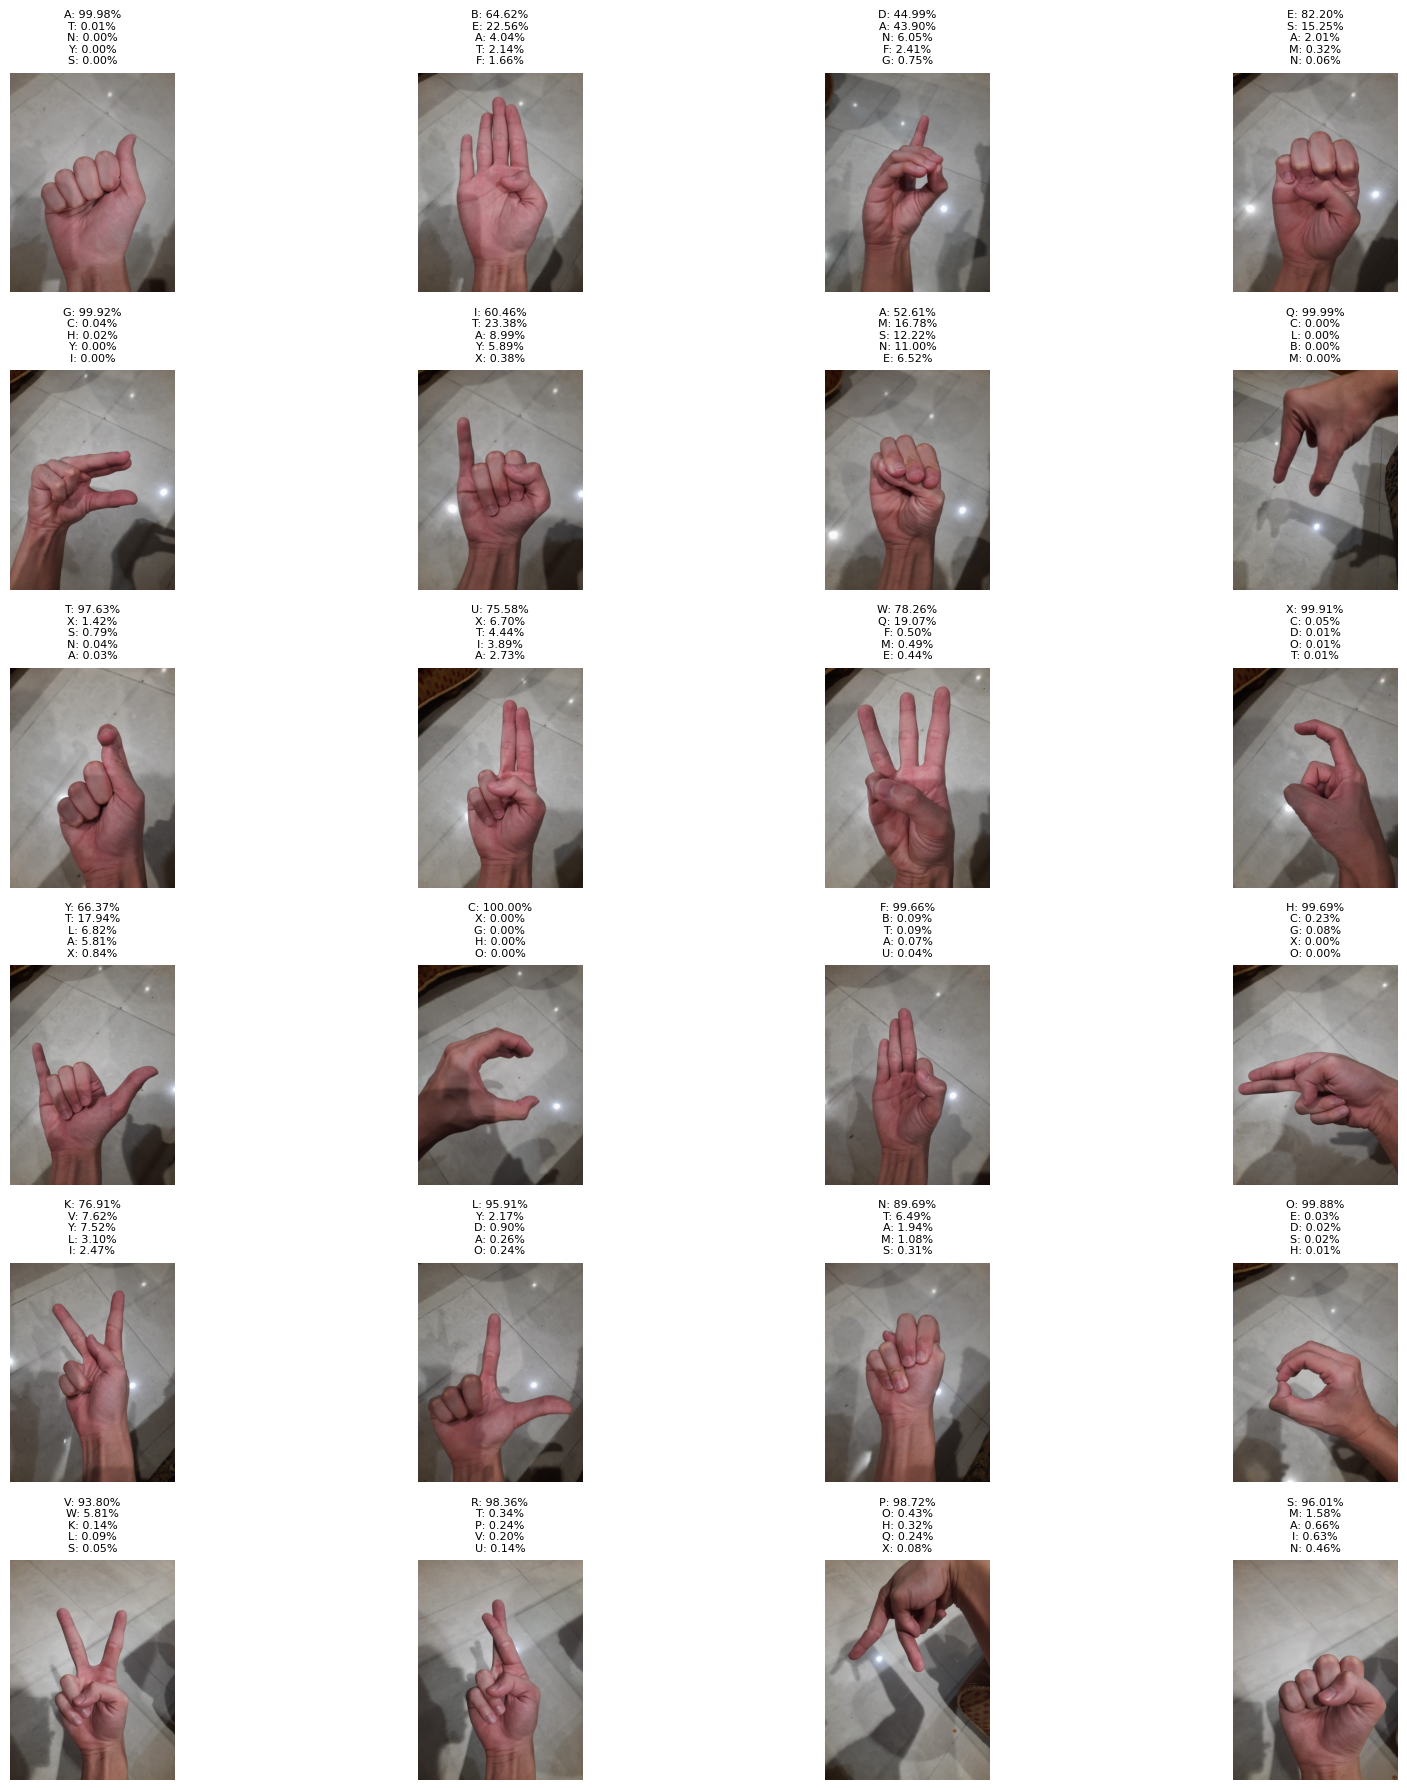

In [48]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import io
from PIL import Image

# Load the trained model
model = load_model('modelslfinal.h5')

# Function to load images directly from the ZIP file
def load_images_from_zip(zip_path):
    images = []
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                img_data = zip_ref.read(file_name)
                img = Image.open(io.BytesIO(img_data))
                images.append((img, file_name))
    return images

# Function to preprocess image and predict class probabilities for all classes
def classify_image(img, class_labels):
    img = img.resize((224, 224))  # Resize image to match model input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0

    # Predict the classes
    prediction = model.predict(img_array)

    # Get the probabilities for all classes
    probabilities = prediction[0]

    # Prepare a sorted list of tuples (class label, probability) for visualization
    class_probabilities = [(class_labels[idx], probabilities[idx]) for idx in range(len(class_labels))]

    return class_probabilities, probabilities

# Function to display multiple images with their class probabilities in a grid
def display_images_with_probabilities(zip_path, class_labels):
    # Load images from ZIP
    images = load_images_from_zip(zip_path)

    # Set up the subplot grid (6 rows x 4 columns for 24 images)
    plt.figure(figsize=(18, 18))

    for i, (img, img_name) in enumerate(images[:24]):  # Only display the first 24 images
        # Classify the image and get probabilities
        class_probabilities, probabilities = classify_image(img, class_labels)

        # Sort the class probabilities in descending order
        class_probabilities = sorted(class_probabilities, key=lambda x: x[1], reverse=True)

        # Plot the image in the i-th subplot
        plt.subplot(6, 4, i + 1)  # 6 rows, 4 columns
        plt.imshow(img)
        plt.axis('off')

        # Display the top 5 class probabilities in the title
        top_5_classes = class_probabilities[:5]
        title_text = "\n".join([f"{cls[0]}: {cls[1] * 100:.2f}%" for cls in top_5_classes])
        plt.title(title_text, fontsize=8)

    plt.tight_layout()
    plt.show()

# Get class labels (assuming they are sorted alphabetically in the training directory)
class_labels = sorted(os.listdir(train_dir))  # Ensure your class labels are sorted

# Path to the ZIP file containing test images
zip_path = '/content/test_image.zip'  # Update this with the path to your zip file

# Run the process to display images and their probabilities
display_images_with_probabilities(zip_path, class_labels)


## Deployment

## Tensorflow.js


In [ ]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [ ]:
model.save_weights('modelslfinal.weights.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('modelslfinal.h5')

In [ ]:
import time
saved_model_path = "./model/{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./model/

2024-12-08 17:07:42.498416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733677662.520043   41789 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733677662.526492   41789 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
import shutil

# Specify the folder path and the name for the output zip file
folder_path = '/content/model'
output_zip = '/content/modelslfinaljs.zip'

# Create a zip file
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', folder_path)


'/content/modelslfinaljs.zip'

## TFLite

In [ ]:
import pathlib

In [ ]:
export_dir = '/tmp/saved_model'
tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

44664

In [ ]:
import tensorflow as tf

# Load the trained Keras model
model = tf.keras.models.load_model('modelslfinal.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('modelslfinal.tflite', 'wb') as f:
    f.write(tflite_model)

# Print the TFLite model details
print("TFLite model converted and saved as 'modelslfinal.tflite'")
print("TFLite model details: ")
print(tflite_model)


Saved artifact at '/tmp/tmplrwaepoh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 24), dtype=tf.float32, name=None)
Captures:
  133977364384224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977351528944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977369017184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977369016480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977369008736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977369012432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977369009088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977369011376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977369005744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133977369008560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13397736900521